# Turismo em Portugal
### Projeto Final de Progamação e Algoritmos II

##### Docente: 
João Orvalho

##### Discentes: 

Carolina Loureiro - a2020142240;

Carolina Silva - a2020119667;

Maria Rei - a2020120515

<img src="progamação.png">

In [1]:
#celula markdown para obter imagem sem mostrar celula
#Image("progamação.png") em celula de codigo tem a mesma função

In [2]:
import json  #importar json
import pandas as pd   #importar os pandas como pd
from pandas.io.json import json_normalize  #importar pandas.io.json como json_normalize
import seaborn as sns  #importar seaborn como sns
import matplotlib.pyplot as plt   #importar o matplotlib.pyplot para os gráficos como plt
import numpy as np  #importar os numpys como np
import matplotlib.image as mpi  #importar matplotlib.image como mpi
from IPython.display import Image #importar IPython.display como Image

## Dados relativos ao número de dormidas nos estabelecimentos no ano 2019

In [3]:
#ter atenção à diferença entre json e cvs
#json é formato diferente(umas listas dentros de outras)
dormidas = pd.read_json("Dormidas nº estadia.json") #leitura do primeiro conjunto de dados
dormidas.head()

,IndicadorCod,IndicadorDsg,MetaInfUrl,DataExtracao,DataUltimoAtualizacao,UltimoPref,Dados
0,9183,Dormidas (N.º) nos estabelecimentos de alojame...,https://www.ine.pt/bddXplorer/htdocs/minfo.jsp...,2021-04-25T19:48:24.514+01:00,2020-09-29,2019,"{'2019': [{'geocod': '1191705', 'geodsg': 'Mon..."


In [4]:
#abrir o ficheiro como objeto
#correr/abrir lista
#with open('Dormidas nº estadia.json') as f:
#    d = json.load(f)
dadosDormidas = json_normalize(dormidas['Dados'])
dadosDormidas.head()

<ipython-input-4-bf3b6c42c003>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dadosDormidas = json_normalize(dormidas['Dados'])


,2019
0,"[{'geocod': '1191705', 'geodsg': 'Mondim de Ba..."


In [5]:
dados2019 = json_normalize(dadosDormidas['2019'][0]) # abrir lista dentro de lista
dados2019.head() # ver as primeiras cinco linhas

<ipython-input-5-adf158af1815>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dados2019 = json_normalize(dadosDormidas['2019'][0]) # abrir lista dentro de lista


,geocod,geodsg,dim_3,dim_3_t,valor,sinal_conv,sinal_conv_desc
0,1191705,Mondim de Basto,BR,Brasil,333,NaN,NaN
1,11A,Área Metropolitana do Porto,BR,Brasil,562249,NaN,NaN
2,11A0104,Arouca,BR,Brasil,261,NaN,NaN
3,11A0107,Espinho,BR,Brasil,3134,NaN,NaN
4,1500811,Portimão,BR,Brasil,25571,NaN,NaN


In [6]:
dados2019.tail() # ver as últimas cinco linhas

,geocod,geodsg,dim_3,dim_3_t,valor,sinal_conv,sinal_conv_desc
17195,11A1310,Paredes,BG,Bulgária,21,NaN,NaN
17196,11A1312,Porto,BG,Bulgária,5636,NaN,NaN
17197,11A1313,Póvoa de Varzim,BG,Bulgária,3585,NaN,NaN
17198,1111605,Paredes de Coura,BG,Bulgária,NaN,-,Dado nulo ou não aplicável
17199,1111606,Ponte da Barca,BG,Bulgária,NaN,-,Dado nulo ou não aplicável


#### Como aceder ao tamanho da tabela de dados de 2019?

In [7]:
tamanho_tabela_1= len(dados2019)
#noção da quantidade de dados (nº de linhas)
print ("Tamanho dos dados:",tamanho_tabela_1) # usamos o print para poder inserir a frase

Tamanho dos dados: 17200


#### Renomear colunas e mostrar colunas importantes

In [8]:
dados=dados2019.rename(columns={'geocod':'Codigo','geodsg':'Geografia','dim_3':'Local','dim_3_t': 'Localidade','valor':'Valor'})
#definir nomes mais simples e ignorar colunas sem valores
dados_1 = dados.loc[:,"Codigo":"Valor"] # mostrar apenas a colunas que pretendemos 
dados_1.head()

,Codigo,Geografia,Local,Localidade,Valor
0,1191705,Mondim de Basto,BR,Brasil,333
1,11A,Área Metropolitana do Porto,BR,Brasil,562249
2,11A0104,Arouca,BR,Brasil,261
3,11A0107,Espinho,BR,Brasil,3134
4,1500811,Portimão,BR,Brasil,25571


#### Quantidade de posições sem valores

In [9]:
# sum vai fazer a soma dos valores em falta, em dada coluna
sem_valores=dados.isna().sum() # bastava utilizar dados.isna().sum(),mas se quisemos nomear todas as funções
sem_valores

Codigo                 0
Geografia              0
Local                  0
Localidade             0
Valor               3700
sinal_conv         13500
sinal_conv_desc    13500
dtype: int64

#### Eliminar colunas com dados em falta

In [10]:
result_sc = dados.dropna(axis='columns') # dropna elimina neste caso as colunas com dados em falta
result_sc.head()

,Codigo,Geografia,Local,Localidade
0,1191705,Mondim de Basto,BR,Brasil
1,11A,Área Metropolitana do Porto,BR,Brasil
2,11A0104,Arouca,BR,Brasil
3,11A0107,Espinho,BR,Brasil
4,1500811,Portimão,BR,Brasil


#### Como aceder aos dados que pertencem a Portugal no ano de 2019

In [11]:
rslt_dados2019 = dados_1.loc[(dados_1 ['Localidade'] == 'Portugal')]
#loc premite aceder aos que pretencem a portugal
rslt_dados2019.head()

,Codigo,Geografia,Local,Localidade,Valor
11008,1191705,Mondim de Basto,PT,Portugal,43199
11009,11A,Área Metropolitana do Porto,PT,Portugal,1997944
11010,11A0104,Arouca,PT,Portugal,27352
11011,11A0107,Espinho,PT,Portugal,44340
11012,1500811,Portimão,PT,Portugal,710048


#### Eliminar linhas com dados em falta

In [12]:
#elimina as linhas com falta de dados nas colunas descritas
result_sl = dados_1.dropna(subset=['Codigo','Geografia','Local','Localidade','Valor'])
result_sl.head()

,Codigo,Geografia,Local,Localidade,Valor
0,1191705,Mondim de Basto,BR,Brasil,333
1,11A,Área Metropolitana do Porto,BR,Brasil,562249
2,11A0104,Arouca,BR,Brasil,261
3,11A0107,Espinho,BR,Brasil,3134
4,1500811,Portimão,BR,Brasil,25571


## Dados relativos aos alojamentos no ano de 2019 na localidade de Águeda

In [13]:
#csv aparece em tabela e "titulos" dá para selecionar/identificar
alojamentos = pd.read_csv("alojamento2019.csv")
alojamentos.head()

,tipo,modalidade,categoria,nome,morada,site,e_mail,telefone,fax,freguesia
0,Empreendimento turístico,Motel,-,Motel Alameda,"EN1, Cavada Nova, 3750-604 Macinhata do Vouga",http://www.alameda-hotel.com/pt-pt,hotelalameda@sapo.pt,234523402.0,234523449.0,Macinhata do Vouga
1,Empreendimento turístico,Residencial,-,Residencial Celeste,"Rua Misericordia de Agueda 713, 3750-130 Agueda",www.residencialceleste.com,residencialceleste@hotmail.com,234602871.0,234602871.0,UF Águeda e Borralha
2,Empreendimento turístico,Residencial,-,Residencial Castro,"Rua da Famel 295, Barrosinhas,ZI EN1 Norte, 37...",www.residencialcastro.pt,geral@residencialcastro.pt,234644356.0,234644993.0,"UF Trofa, Segadães e Lamas"
3,Alojamento local,Moradia,-,Quinta Santa Maria do Monte de Alcobar,"Rua da Escola 120C, 3750-561 Macieira de Alcoba",-,antonio.amaro@ua.pt,NaN,NaN,UF Préstimo e Macieira Alcôba
4,Empreendimento turístico,Hotel,4 estrelas,Hotel Conde de Águeda,"Rua Antonio Ferreira Sucena 7, 3750-121 Águeda",www.hotelcondedagueda.pt,geral@hotelcondedagueda.pt,234610390.0,234610399.0,UF Águeda e Borralha


#### Total de informação em falta e posições em que se encontram

Espaços sem informação: 56


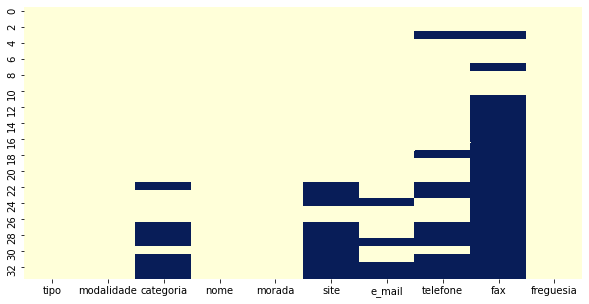

In [14]:
al_sv = alojamentos.isna().sum().sum() #soma de todos os dados em falta, print para incerir frase  
print ("Espaços sem informação:",al_sv) # total dos dados em falta
plt.figure(figsize=(10,5)) #tamanho da imagem 
sns.heatmap(alojamentos.isnull(), cbar=False, cmap="YlGnBu") # mostrar localização dos dados em falta 
al_sv_1=plt.show() # mostrar o gráfico 
al_sv_1

#### Ordenar por ordem alfabética os nomes dos alojamentos

In [15]:
#ordenar os nomes por ordem alfabética
ordem=alojamentos.sort_values(by='nome')
ordem.head()

,tipo,modalidade,categoria,nome,morada,site,e_mail,telefone,fax,freguesia
15,Alojamento local,Estabelecimento de hospedagem - Hostel,-,Agueda Hostel & Friends,"Rua José Maria Veloso 8, 3750-156 Águeda",http://aguedahostel.pt/,geral@aguedahostel.pt,234136620.0,NaN,UF Águeda e Borralha
28,Alojamento local,Quartos,NaN,Blessed Guesthouse,"Urbanização Quinta da Borralha 594, 3 ESQ, 375...",NaN,donizetealves83@gmail.com,NaN,NaN,UF Águeda e Borralha
23,Alojamento local,Apartamento,-,Bloco 3 Alojamento Local,"Avenida do Emigrante 981, BL 3 2 DTO, Ninho d ...",NaN,geral.filipe@gmail.com,NaN,NaN,UF Águeda e Borralha
30,Alojamento local,Moradia,-,Cantinho do Préstimo,"Rua da Almunha 245, 3750- Préstimo",NaN,carlasilva550@hotmail.com,913002928.0,NaN,UF Préstimo e Macieira Alcôba
31,Alojamento local,Moradia,NaN,Casa Magnólia,"Rua da Telha 51, Carvoeiro, 3750-603 Macinhata...",NaN,gabrielangelicoalves@gmail.com,NaN,NaN,Macinhata do Vouga


#### Identificar a quais moradias se enquadram na categoria de motel?

In [16]:
# loc identifica uma "parte/secção"
rslt_alojamentos = alojamentos.loc[(alojamentos['modalidade'] == 'Motel')]
rslt_alojamentos

,tipo,modalidade,categoria,nome,morada,site,e_mail,telefone,fax,freguesia
0,Empreendimento turístico,Motel,-,Motel Alameda,"EN1, Cavada Nova, 3750-604 Macinhata do Vouga",http://www.alameda-hotel.com/pt-pt,hotelalameda@sapo.pt,234523402.0,234523449.0,Macinhata do Vouga
6,Empreendimento turístico,Motel,-,Motel Primavera,"Rua do Vale do Grou 1243, Vale do Grou, 3750- ...",-,-,234666237.0,234666247.0,Aguada de Cima


#### Localização do Motel Alameda

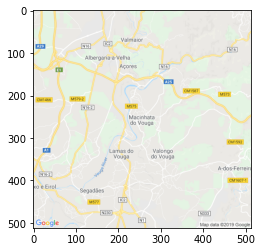

In [17]:
%matplotlib inline
# visualização da morada do motel "Motel Alameda"
map_vouga = plt.imread('macinhata-do-vouga.png')
imgplot = plt.imshow(map_vouga)

## Dados relativos ao atendimentos no posto turistico de Águeda (Turistas portugueses)

In [18]:
#csv mudificado pelo grupo assim premite a sua observação como objeto
with open ("Ano atendimento.csv") as f:
    f.readline() 
    for line in f: 
        print(line)

2010,3832

2011,2601

2012,2299

2013,3173

2014,4560

2015,5592

2016,5504

2017,5170

2018,28122

2019,26580

2020,10015







In [19]:
#dados trasformados devido má construção dos mesmos
atendimentos= pd.read_csv("Ano atendimento.csv")
atendimentos

,ano,atendimentos
0,2010,3832
1,2011,2601
2,2012,2299
3,2013,3173
4,2014,4560
5,2015,5592
6,2016,5504
7,2017,5170
8,2018,28122
9,2019,26580


#### Total de atendimentos durante 10 anos

In [20]:
#sum é a soma dos 10 anos de atendimentos
at_10=atendimentos["atendimentos"].sum()
print ("Total de atendimentos durante 10 anos:",at_10)

Total de atendimentos durante 10 anos: 97448


#### Média de atendimento durante 10 anos

In [21]:
#media de atendimento durente os 10 anos (mean=media)
media_at=atendimentos["atendimentos"].mean()
print ("Média dos atendimentos durante 10 anos:",media_at)

Média dos atendimentos durante 10 anos: 8858.90909090909


#### Últimos 2 anos de atendimento

In [22]:
#ver as 2 ultimas linhas podemos ver ultimos 2 anos
ultimos_anos=atendimentos[9:] # nomear todos os dados
ultimos_anos

,ano,atendimentos
9,2019,26580
10,2020,10015


#### Gráfico representando atendimentos durante 10 anos

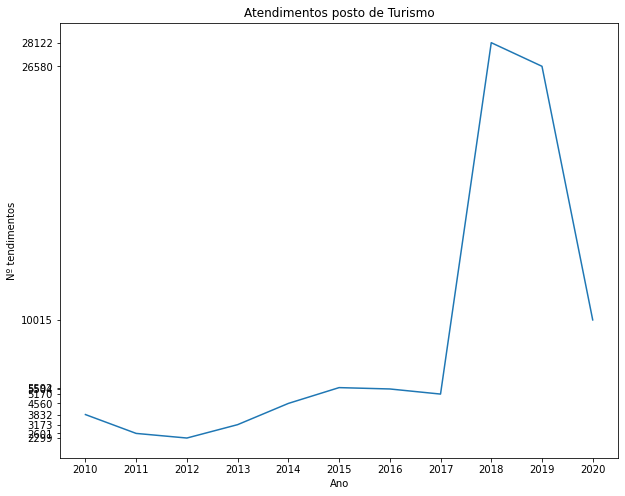

In [23]:
%matplotlib inline
#ano = df ["Ano"].tolist()
#monthList  = df ["Nº atendimentos"].tolist()
plt.plot(atendimentos["ano"], atendimentos["atendimentos"], label = 'Atendimentos por ano')
plt.xlabel('Ano') # nomear x
plt.ylabel('Nº tendimentos')  # nomear y
plt.xticks(atendimentos["ano"]) # defenir x
plt.title('Atendimentos posto de Turismo') # defenir titulo
plt.yticks(atendimentos["atendimentos"]) # # defenir y
plt.gcf().set_size_inches(10, 8) # defenir tamanho do grafio
g_at=plt.show() #mostrar gráfico 
g_at

## Dados relativos á ocupação de 4 hoteis 

In [24]:
ocupação= pd.read_json("list_Ocupacao.json")
#json- listas dentro de listas
ocupação

,Classificacao,Categoria,NrEstabelecimento,Tx_Ocup_Cama,Tx_Ocup_Quarto
0,HOTEL,5 Estrelas,24,77.17,82.51
1,HOTEL,4 Estrelas,65,85.17,92.02
2,HOTEL,3 Estrelas,40,85.88,92.22
3,HOTEL-APARTAMENTO,NaN,6,85.21,92.56


#### Subtituição dos valores nulos por 0

In [25]:
categoria = ocupação.fillna(0) # .fillna vai subtuir os dados em falta pelo numero entre ()
categoria

,Classificacao,Categoria,NrEstabelecimento,Tx_Ocup_Cama,Tx_Ocup_Quarto
0,HOTEL,5 Estrelas,24,77.17,82.51
1,HOTEL,4 Estrelas,65,85.17,92.02
2,HOTEL,3 Estrelas,40,85.88,92.22
3,HOTEL-APARTAMENTO,0,6,85.21,92.56


#### Soma do número de quartos/camas ocupados?

In [26]:
soma_quatos=ocupação["Tx_Ocup_Quarto"].sum()
#somas da ocupação de quartos
soma_camas=ocupação["Tx_Ocup_Cama"].sum()
#somas da ocupação de camas
print ("Soma da ocupação de quartos:",soma_quatos) #print para poder utilizar a frase
print ("Soma da ocupação de camas:",soma_camas)

Soma da ocupação de quartos: 359.31
Soma da ocupação de camas: 333.43


#### Especificações do hotel com 3 estrelas?

In [27]:
estrelas_3=ocupação.loc [2]
# mostra linha 2 de maneira mais especifica
estrelas_3.head()

Classificacao             HOTEL
Categoria            3 Estrelas
NrEstabelecimento            40
Tx_Ocup_Cama              85.88
Tx_Ocup_Quarto            92.22
Name: 2, dtype: object

#### Descrição da tabela "Ocupação"

In [28]:
d_ocp=ocupação.describe()
#descritção de toda a tabela
d_ocp

,NrEstabelecimento,Tx_Ocup_Cama,Tx_Ocup_Quarto
count,4.000000,4.000000,4.000000
mean,33.750000,83.357500,89.827500
std,25.038304,4.137837,4.883423
min,6.000000,77.170000,82.510000
25%,19.500000,83.170000,89.642500
50%,32.000000,85.190000,92.120000
75%,46.250000,85.377500,92.305000
max,65.000000,85.880000,92.560000


## Dados relativos à cidade Lisboa no ano de 2015 mostrando o gasto médio diário individual (sem trasporte)
Inquérito motivacional cidade Lisboa - 1393 hóspedes na hotelaria de Lisboa

In [29]:
preços_1 = [["Alojamento",53.16,74.76,57.78], ["Alimentação",32.52,40.16,33.50], ["Atracções",7.89,1.18,6.41],
            ["Deslocações",5.86,10.83,6.62], ["Outros",21.73,27.52,23.13], ["Global",121.17,154.46,127.43]]
#defenir dados 
pd.DataFrame(preços_1, columns=["Tipo","Lazer","Negócios","Total"]) # defenir colunas
#criação de tabela com dados que não apresentavam qualidade para utilizão

,Tipo,Lazer,Negócios,Total
0,Alojamento,53.16,74.76,57.78
1,Alimentação,32.52,40.16,33.50
2,Atracções,7.89,1.18,6.41
3,Deslocações,5.86,10.83,6.62
4,Outros,21.73,27.52,23.13
5,Global,121.17,154.46,127.43


#### Gráfico diferença de preços entre Lazer e Negócio

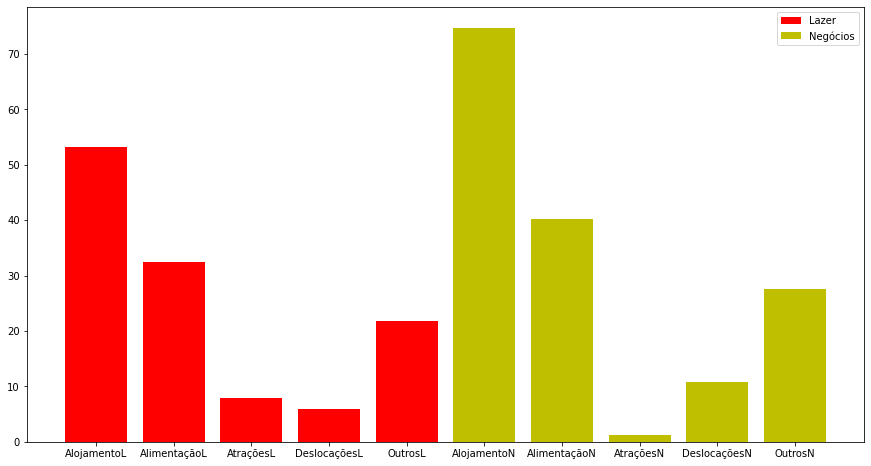

In [30]:
x = ["AlojamentoL","AlimentaçãoL","AtraçõesL","DeslocaçõesL","OutrosL"]
y = [53.16,32.52,7.89,5.86,21.73]
x2 = ["AlojamentoN","AlimentaçãoN","AtraçõesN","DeslocaçõesN","OutrosN"]
y2 = [74.76,40.16,1.18,10.83,27.52]
# Exposição dos dados
# Criar gráfico
plt.gcf().set_size_inches(15, 8) #mudar dimensões do gráfico
plt.bar(x, y, label = 'Lazer', color = 'r') # defenir legenda e cor da barra
plt.bar(x2, y2, label = 'Negócios', color = 'y')
plt.legend() 
gra_preços=plt.show() # nomear todos o exercicios
gra_preços

#### Gráfico Global

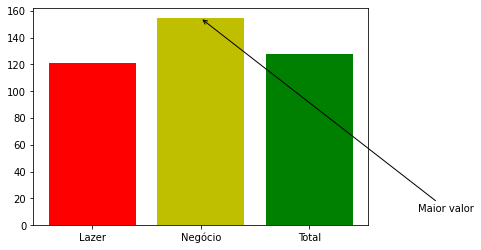

In [31]:
x = ["Lazer"]
y = 121.17
x2 = ["Negócio"]
y2 = 154.46
x3 = ["Total"]
y3 = 127.43
plt.bar(x, y, color = 'r') # defenir dados da barra e cor
plt.bar(x2, y2, color = 'y')
plt.bar(x3, y3, color = 'g')
plt.annotate("Maior valor", # adicionar anotação ao gráfico
            xy=(x2,y2),  # defenir locar que anotação indica
            xytext=(3, 10), # defenir localização da anotação
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3")) # selecionar tipo de indicação
global_1= plt.show()
global_1

#### Gráfico total de todos os dados

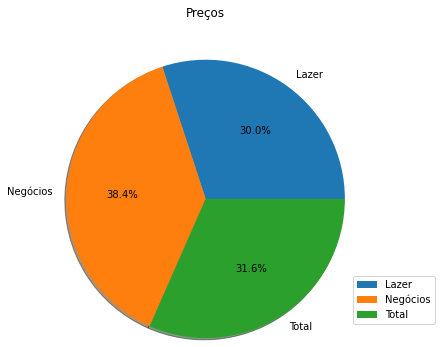

In [32]:
%matplotlib inline
labels = ['Lazer', 'Negócios', 'Total']
#preçosData= [preços_1['Lazer'].sum(), preços_1['Negócios'].sum(), preços_1['Total'].sum()]
preçosData= [242.33, 309.53, 254.87] # realização da conta exterior 
plt.axis("equal") #define uma escala igual
plt.pie(preçosData, labels=labels, autopct='%1.1f%%',shadow=True, radius =1.6) # pie= gráfico formato "tarte" 
# autopct tem a função de apresentar as percentagens (%) das partes
# a função shadow cria uma sombra no gráfico
# por defenição o radius (raio) é 1
plt.legend(loc='lower right',bbox_to_anchor=(1.2,-0.1)) #localização da legenda
plt.title('Preços',pad= 73) # pad vai mexer com a localição do titulo para a parte superior
total=plt.show() 
total

## Dados relativos aos lugares públicos turisticos
Os presentes dados não se enquadram na região de Potugal, no entanto o grupo achou que os dados seriam necessarios para a realização de exercicios.

In [33]:
at = pd.read_csv("dataset-lugares-publicos-lugares-turisticos.csv")
renomeação_at=at.rename(columns={"Nombre":"Nome",'Latitud':'Latitude',"Longuitud":"Longitude"})
# renomeação das colunas devido a serem nomes estrangueiros
renomeação_at.head()

,LT01,Nome,Tipo,TipoLugar,Pais,Provincia,Ciudad,Punto de Localización,Latitude,Longitude
0,LT02,Río Santa Bárbara,LugaresTuristicos,Rio,Ecuador,Azuay,Gualaceo,Se ubica en el Cantón de Gulaceo,-29.047956,-78.778787
1,LT03,Represa de Paute,LugaresTuristicos,Represa,Ecuador,Azuay,Cuenca,NaN,-2.586111,-78.558333
2,LT04,El Turi,LugaresTuristicos,Iglesia,Ecuador,Azuay,Cuenca,NaN,-2.922357,-79.0103607
3,LT05,Cascada Irha,LugaresTuristicos,Casacada,Ecuador,Azuay,Cuenca,Se encuentra ubicado a 5 km del cantón Girón e...,NaN,NaN
4,LT06,Parque Nacional Cajas,LugaresTuristicos,Parque,Ecuador,Azuay,Cuenca,NaN,-2.848737,-79.2537609


#### Renomeação das colunas das cordenadas e mostrar importantes

In [34]:
coordenadas = renomeação_at.loc[:,"Latitude":"Longitude"] # mostrar apenas as colunas que precisamos
coordenadas.head()

,Latitude,Longitude
0,-29.047956,-78.778787
1,-2.586111,-78.558333
2,-2.922357,-79.0103607
3,NaN,NaN
4,-2.848737,-79.2537609


#### Eliminar linhas com dados em falta

In [35]:
c_sl = coordenadas.dropna(subset=['Latitude','Longitude']) # eliminar linhas com dados em falta em ambas as colunas
c_sl.head()

,Latitude,Longitude
0,-29.047956,-78.778787
1,-2.586111,-78.558333
2,-2.922357,-79.0103607
4,-2.848737,-79.2537609
5,-1.511230,-78.8609122


#### Ordenar de forma descendente os dados

In [36]:
descendente=c_sl.sort_values(by=['Latitude'], ascending=False)
#sort_values ordena por defeito de forma ascendente, com a nomeação False a ordenção fica de forma descendente
#se aplicar True a ordenação fica de forma ascendente
descendente

,Latitude,Longitude
71,21.599722,-99.098889
18,1.093531,-78.4524591
37,1.086367,-79.157314
33,0.865753,-78.801299
15,0.821520,-77.73217
...,...,...
110,-4.062094,-78.948623
55,-4.262329,-79.2253776
54,-4.283333,-79
68,-4.733333,-77.066667


#### Transformar os valores em strings

In [37]:
#transformar float em string
float_value = -2.8487
string_value = str(float_value)
float_value_1 = -79.2537
string_value_1 = str(float_value_1)
string_value,string_value_1

('-2.8487', '-79.2537')

#### Transformar colunas em valores strings

In [38]:
#transformar as colunas em  valores strings para poderem ser usadas no próximo exercício
df = c_sl.astype({"Latitude": 'str', "Longitude": 'str'})
df=df.head(10)
df

,Latitude,Longitude
0,-29.047956,-78.778787
1,-2.5861110000000003,-78.558333
2,-2.9223567000000004,-79.0103607
4,-2.8487367999999997,-79.2537609
5,-1.5112299999999999,-78.8609122
7,-1.6700716,-79.0607285
9,-1.4043069,-78.754549
10,-2.548985,-78.8714679
11,-2.4230556,-78.8597222
13,-2.7381951,-78.8472003


#### Gráfico de coordenadas

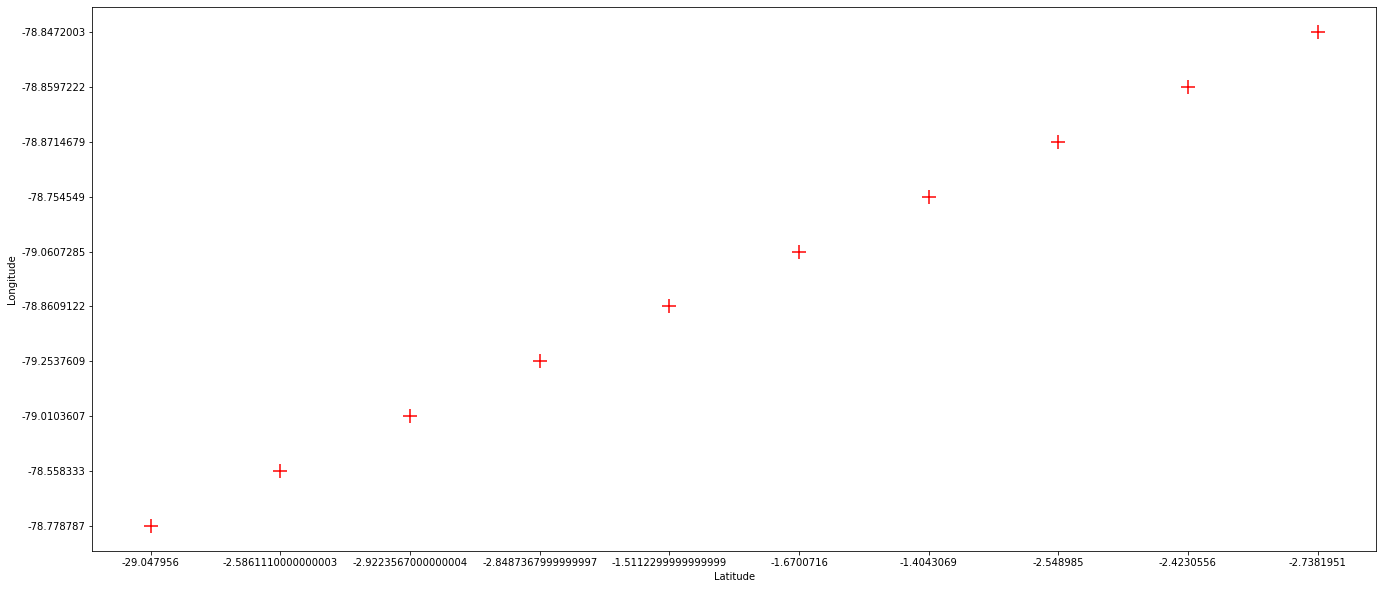

In [39]:
"""Outra forma de realizar o exercício com formas e cores diferentes:
x=(df["Longitude"])
y=(df["Latitude"])
fig = plt.figure()
ax = plt.plot(x,y,'.r')
plt.show()"""
df.plot(kind="scatter", x="Latitude", y="Longitude", alpha=1, marker="+", color='red', s=200) # defenir x e y 
# defenir formato e cor
# alpha refere-se á opacidade de dos pontos
# kind é o tipo de formato do grafico
# com a função s coonsegui mos alterar o tamanho do marker
plt.gcf().set_size_inches(23, 10) # dimensões do gráfico
coordenada_1=plt.show()
coordenada_1

### Conclusão:
Em suma podemos concluir que o presente projeto permitiu ao grupo aprender variadas informações sobre o turismo Português e Estrangeiro, mas acima de tudo, e o mais importante permitiu-nos aprender novos conteúdos programáticos e a cima de tudo implementar aqueles que foram aprendidos em aula.
Achamos deveras gratificante para a completação e finalização desta Unidade Curricular a execução deste projeto.